# Analyzing survey data

<br>

**Language: R**

This notebook provides the code for the descriptive analysis, inferential analysis, and visualization of the main survey data. See dissertation Chapter 6 for details.

**Notebook contents:**
- [Initial setup](#Initial-setup)
- [Descriptive statistics](#Descriptive-statistics)
- [Correlation analysis](#Correlation-analysis)
- [Variable coding](#Variable-coding)
- [Model 1 - Lexical Resource (experimental)](#Model-1---Lexical-Resource-(experimental))
- [Model 2 - Lexical Resource (exploratory)](#Model-2---Lexical-Resource-(exploratory))
- [Model 3 - Holistic score](#Model-3---Holistic-score-)
- [Survery comments](#Survey-comments)

## Initial setup

In [1]:
# Set notebook preferences

options(repr.matrix.max.cols=50, repr.matrix.max.rows=100) # Allow viewing of bigger dataframes
options(warn=-1) # Suppress warnings

In [2]:
# Load libraries

library(ggcorrplot)
library(tidyverse)
library(emmeans)
library(multcomp)
library(sjPlot)
library(psych)

Loading required package: ggplot2

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: mvtnorm

Loading required package: survival

Loading required package: TH.data

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select



Attaching package: ‘TH.data’


The following object is masked from ‘package:MASS’:

    geyser



Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




In [3]:
# Read in survey data

ratings <- read.csv(file="../docs/ratings_R.csv", header=TRUE, sep=",")
head(ratings,1)
nrow(ratings)

,response_id,text_id,rater_id,CEFR,TR,CC,LR,GRA,HOL,soph,soph_type,accuracy,comment,duration,text_order,gender,age,education,TESOL_cert,ELT_exp_yrs,IELTS_status,current,IELTS_exp_yrs,rater_L1,rater_English,student_L1,L1_range,prof_range,TR_fair,CC_fair,LR_fair,GRA_fair,HOL_fair
,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Text1,R1,B1,4.3,4.3,4.3,3.7,3.4,low,NA,low,The candidate uses only basic vocabulary repetitively. Errors are frequent and cause strain for the reader.,q3,C1_B1_B2,Female,30-39,BA,diploma,6-10,examiner,former,6-10,Spanish,L2,Arabic,wide,wide,4.9,4.8,5.3,4.8,4.8


[1] 128

In [4]:
# Keep relevant columns

ratings <- ratings[c("CEFR","soph","soph_type","accuracy","TR_fair","CC_fair","LR_fair","GRA_fair","HOL_fair")]
head(ratings,3)
nrow(ratings)

,CEFR,soph,soph_type,accuracy,TR_fair,CC_fair,LR_fair,GRA_fair,HOL_fair
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,B1,low,NA,low,4.9,4.8,5.3,4.8,4.8
2,B1,low,NA,low,4.9,4.8,5.3,4.8,4.8
3,B1,low,NA,low,4.9,4.8,5.3,4.8,4.8


[1] 128

In [5]:
# Convert columns to factors

ratings$CEFR <- factor(ratings$CEFR, levels = c("B1","B2","C1"))
ratings$soph <- factor(ratings$soph, levels = c("low","mid","high"))
ratings$soph_type <- factor(ratings$soph_type, levels = c("non_col","col"))
ratings$accuracy <- factor(ratings$accuracy, levels = c("low","high"))

## Correlation analysis

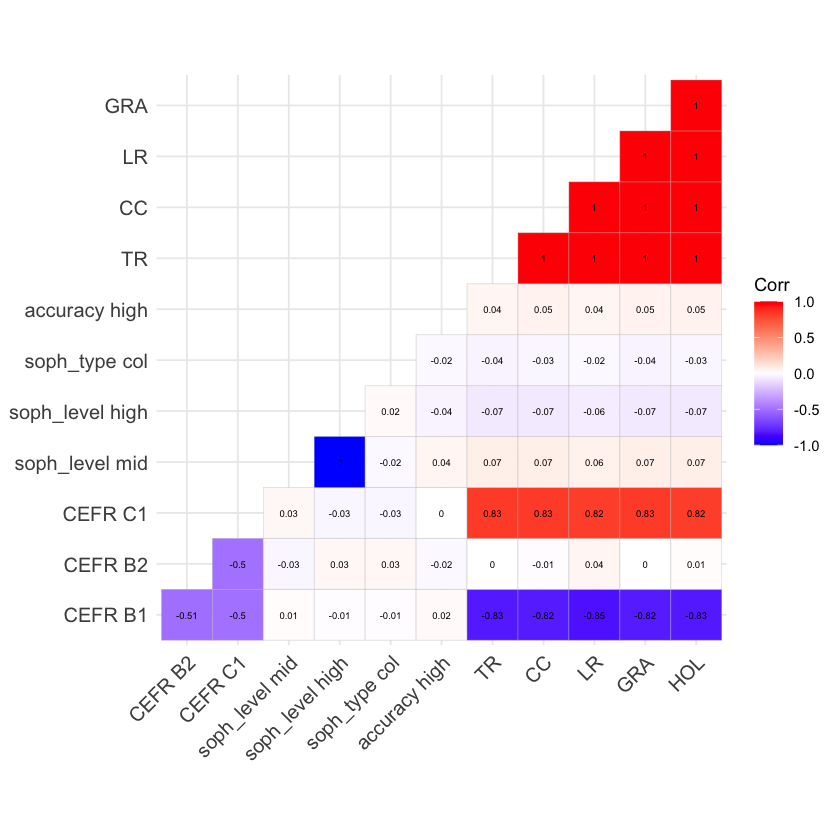

In [6]:
M = model.matrix(~0+., data=ratings) %>% 
  cor() %>% 
  ggcorrplot(show.diag = F, type="lower", lab=TRUE, lab_size=2)

M + 
    scale_x_discrete(labels = c("CEFR B2", "CEFR C1","soph_level mid", "soph_level high","soph_type col","accuracy high","TR", "CC", "LR", "GRA","HOL")) + 
    scale_y_discrete(labels = c("CEFR B1", "CEFR B2", "CEFR C1","soph_level mid", "soph_level high","soph_type col","accuracy high","TR", "CC", "LR", "GRA"))

In [7]:
# Get p-values

M2 = model.matrix(~0+., data=ratings) %>% 
  cor()
cor_test_mat <- corr.test(M2)$p       # Apply corr.test function
cor_test_mat                         # Print matrix of p-values

,CEFRB1,CEFRB2,CEFRC1,sophmid,sophhigh,soph_typecol,accuracyhigh,TR_fair,CC_fair,LR_fair,GRA_fair,HOL_fair
CEFRB1,0.000000e+00,1.0000000,1.157686e-01,1.0000000,1.0000000,1.0000000,1.0000000,2.485358e-04,2.733324e-04,1.339557e-04,2.651180e-04,2.160386e-04
CEFRB2,2.749192e-01,0.0000000,1.000000e+00,1.0000000,1.0000000,1.0000000,1.0000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
CEFRC1,2.572637e-03,0.3187640,0.000000e+00,1.0000000,1.0000000,1.0000000,1.0000000,2.117890e-04,1.879474e-04,3.396872e-04,2.003243e-04,2.422962e-04
sophmid,8.810776e-01,0.8341513,7.717495e-01,0.0000000,0.0000000,1.0000000,1.0000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
sophhigh,8.810776e-01,0.8341513,7.717495e-01,0.0000000,0.0000000,1.0000000,1.0000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
soph_typecol,4.945950e-01,0.8336902,4.033254e-01,0.8276308,0.8276308,0.0000000,1.0000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
accuracyhigh,6.343646e-01,0.8767699,7.064836e-01,0.8229004,0.8229004,0.6564431,0.0000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
TR_fair,5.072160e-06,0.9730155,4.072865e-06,0.7121623,0.7121623,0.3781053,0.7126538,0.000000e+00,1.003998e-20,2.882956e-15,6.180403e-22,2.656709e-20
CC_fair,5.815583e-06,0.9858955,3.480508e-06,0.7197926,0.7197926,0.3815576,0.7189330,1.593648e-22,0.000000e+00,9.570987e-15,1.294786e-23,6.510685e-19
LR_fair,2.435559e-06,0.9153000,7.384504e-06,0.7411085,0.7411085,0.3935876,0.7040483,4.970613e-17,1.709105e-16,0.000000e+00,6.947660e-15,1.736851e-16


## Descriptive statistics

In [8]:
summary(ratings)

 CEFR      soph      soph_type  accuracy     TR_fair         CC_fair     
 B1:43   low :24   non_col:53   low :64   Min.   :4.700   Min.   :4.500  
 B2:43   mid :50   col    :51   high:64   1st Qu.:5.100   1st Qu.:5.000  
 C1:42   high:54   NA's   :24             Median :6.500   Median :6.300  
                                          Mean   :6.542   Mean   :6.362  
                                          3rd Qu.:7.600   3rd Qu.:7.400  
                                          Max.   :8.700   Max.   :8.500  
    LR_fair         GRA_fair        HOL_fair    
 Min.   :5.000   Min.   :4.500   Min.   :4.500  
 1st Qu.:5.400   1st Qu.:5.000   1st Qu.:5.000  
 Median :7.000   Median :6.300   Median :6.400  
 Mean   :6.952   Mean   :6.365   Mean   :6.396  
 3rd Qu.:8.100   3rd Qu.:7.400   3rd Qu.:7.400  
 Max.   :9.000   Max.   :8.500   Max.   :8.500  

In [9]:
# Obtain basic descriptive statistics using tidyverse

# CEFR
desc_CEFR <- ratings %>% #tell R how the data are organized by putting original d
group_by(CEFR) %>%  #tells R how to group the data based on a factor 'var
   summarise_at("LR_fair", #summarize function provides sd, not given by base 
               list(mean = mean.rm.na <- function(x) mean(x,na.rm=T),  
                    sd = sd, median = median, min = min, max = max)) 
print(desc_CEFR)

# A tibble: 3 × 6
  CEFR   mean    sd median   min   max
  <fct> <dbl> <dbl>  <dbl> <dbl> <dbl>
1 B1     5.34 0.196    5.4   5     5.7
2 B2     7.01 0.330    7     6.4   7.6
3 C1     8.54 0.431    8.7   7.7   9  


In [10]:
# Sophistication
desc_soph <- ratings %>% #tell R how the data are organized by putting original d
group_by(soph) %>%  #tells R how to group the data based on a factor 'var
   summarise_at("LR_fair", #summarize function provides sd, not given by base 
               list(mean = mean.rm.na <- function(x) mean(x,na.rm=T),  
                    sd = sd, median = median, min = min, max = max)) 
print(desc_soph)

# A tibble: 3 × 6
  soph   mean    sd median   min   max
  <fct> <dbl> <dbl>  <dbl> <dbl> <dbl>
1 low    6.93  1.43   6.9    5.2   8.9
2 mid    7.03  1.45   7.15   5     9  
3 high   6.89  1.23   6.9    5.4   9  


In [11]:
# Accuracy
desc_acc <- ratings %>% #tell R how the data are organized by putting original d
group_by(accuracy) %>%  #tells R how to group the data based on a factor 'var
   summarise_at("LR_fair", #summarize function provides sd, not given by base 
               list(mean = mean.rm.na <- function(x) mean(x,na.rm=T),  
                    sd = sd, median = median, min = min, max = max)) 
print(desc_acc)

# A tibble: 2 × 6
  accuracy  mean    sd median   min   max
  <fct>    <dbl> <dbl>  <dbl> <dbl> <dbl>
1 low       6.94  1.35    7.1   5     8.9
2 high      6.97  1.36    6.9   5.2   9  


In [12]:
# Soph_type
desc_sophtype <- ratings %>% #tell R how the data are organized by putting original d
group_by(soph_type) %>%  #tells R how to group the data based on a factor 'var
   summarise_at("LR_fair", #summarize function provides sd, not given by base 
               list(mean = mean.rm.na <- function(x) mean(x,na.rm=T),  
                    sd = sd, median = median, min = min, max = max)) 
print(desc_sophtype)

# A tibble: 3 × 6
  soph_type  mean    sd median   min   max
  <fct>     <dbl> <dbl>  <dbl> <dbl> <dbl>
1 non_col    6.99  1.39    7.1   5     9  
2 col        6.92  1.29    6.9   5.1   8.8
3 NA         6.93  1.43    6.9   5.2   8.9


## Variable coding

By using contrast coding, we can see which factors matter when holding everything else constant.

In [13]:
# First determine whta the contrasts are

contr.sum(3) # Contrasts for variables with three levels
contr.sum(2) # Contrasts for variables with two levels

1,1,0
2,0,1
3,-1,-1


1,1
2,-1


In [14]:
# Contrast code CEFR (3 levels)

contrasts(ratings$CEFR) = contr.sum(3)

**CEFR contrast description:**  
- rows are the three levels - row 1 = B1, row 2 = B2, row 3 = C1
- columns are the two contrasts (3-1) - they compare 1 and -1 and ignore 0
- column 1 (1, 0, -1) is contrast1 - compares 1 (B1) and -1 (C1), ignores 0 (B2)
- column 2 (0, 1, -1) is contrast2 - compares 1 (B2) and -1 (C1), ignores 0 (B1)

Overall:  
- contrast 1 - B1-C1
- contrast 2 - B2-C1

In [15]:
# Contrast code sophistication (3 levels)

contrasts(ratings$soph) = contr.sum(3)

**Sophistication contrast description:**  
- rows are the three levels - row 1 = low, row 2 = mid, row 3 = high
- columns are the two contrasts (3-1) - they compare 1 and -1 and ignore 0
- column 1 (1, 0, -1) is contrast1 - compares 1 (low) and -1 (high), ignores 0 (mid)
- column 2 (0, 1, -1) is contrast2 - compares 1 (mid) and -1 (high), ignores 0 (low)

Overall: 
- contrast 1 - low-high
- contrast 2 - mid-high

In [16]:
# Contrast code accuracy (2 levels)

contrasts(ratings$accuracy) = contr.sum(2)

**Accuracy contrast description:**  
- rows are the two levels - row 1 = low, row 2 = high
- columns are the one contrast (2-1) - they compare 1 and -1
- column 1 (1, -1) is contrast1 - compares 1 (low) and -1 (high)

Overall:  
- contrast 1 - low-high

In [17]:
# Contrast code soph_type (2 levels)

contrasts(ratings$soph_type) = contr.sum(2)

**Soph type contrast description:**  
- rows are the two levels - row 1 = low, row 2 = high
- columns are the one contrast (2-1) - they compare 1 and -1
- column 1 (1, -1) is contrast1 - compares 1 (non-col) and -1 (col)

Overall:  
- contrast 1 - non-col - col

## Model 1 - Lexical Resource (experimental)

Experimental - all variables of interest included and motivated interactions:  

Variables  
- sophistication
- sophistication type
- accuracy
- proficiency (CEFR)  

Interactions  
- CEFR and sophistication
- CEFR and accuracy
- sophistication and accuracy
- sophistication and sophistication type

#### Create model

In [18]:
LR_exp <- lm(LR_fair ~ CEFR + TR_fair + CC_fair + GRA_fair + soph + accuracy + soph_type +
             CEFR:soph + CEFR:accuracy + soph:accuracy + soph:soph_type, data = ratings)

#### Model interpretation

- Estimates are difficult to interpret because they are contrasts (need to be careful of + - signs)
- Useful to see which variables are significant
- For significant variables run post-hoc comparisons
- For significant interactions, create table of estimated means and plot the interactions
- Get CI figures from the tab model which pops up in different tab

In [19]:
# Summary of model

summary(LR_exp)
tab_model(LR_exp)


Call:
lm(formula = LR_fair ~ CEFR + TR_fair + CC_fair + GRA_fair + 
    soph + accuracy + soph_type + CEFR:soph + CEFR:accuracy + 
    soph:accuracy + soph:soph_type, data = ratings)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.045508 -0.016635 -0.002512  0.015497  0.058981 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          0.830850   0.069382  11.975  < 2e-16 ***
CEFR1               -0.180466   0.017737 -10.174  < 2e-16 ***
CEFR2                0.069697   0.006651  10.479  < 2e-16 ***
TR_fair              0.883125   0.144355   6.118 2.49e-08 ***
CC_fair             -0.826610   0.262354  -3.151  0.00222 ** 
GRA_fair             0.878730   0.198713   4.422 2.75e-05 ***
sophhigh             0.031867   0.006244   5.104 1.87e-06 ***
accuracy1           -0.004920   0.004653  -1.057  0.29324    
soph_type1          -0.021671   0.004434  -4.887 4.50e-06 ***
CEFR1:sophhigh      -0.013969   0.009899  -1.411  0.16165    
CEFR2

Argument 'df_method' is deprecated. Please use 'ci_method' instead.



### Post-hoc analyses (regressions)

Because there is no soph_type for low soph, it is also necessary to create a separate model without soph_type, otherwise there is not contrast involving low soph.

In [20]:
# Create LR experimental model v2 without soph_type

LR_exp2 <- lm(LR_fair ~ CEFR + TR_fair + CC_fair + GRA_fair + soph + accuracy +
             CEFR:soph + CEFR:accuracy + soph:accuracy
              , data = ratings)

#### CEFR post-hoc analyses

In [21]:
# Use emmeans for the analysis
LR_exp_CEFR <- emmeans(LR_exp, "CEFR")

# Specify the levels
B2vsB1 <- c(-1, 1, 0) # compare mean in B2 to mean in B1, ignore C1
C1vsB1 <- c(-1, 0, 1) # compare mean in C1 to mean in B1, ignore B2
C1vsB2 <- c(0, -1, 1) # compare mean in C1 to mean in B2, ignore B1

# Contrast the levels
contrast(LR_exp_CEFR, method=list("B2vsB1"=B2vsB1,"C1vsB1"=C1vsB1,"C1vsB2"=C1vsB2),adjust="sidak")

NOTE: Results may be misleading due to involvement in interactions



 contrast estimate     SE df t.ratio p.value
 B2vsB1     0.2520 0.0173 89  14.551  <.0001
 C1vsB1     0.3103 0.0312 89   9.952  <.0001
 C1vsB2     0.0583 0.0172 89   3.398  0.0030

Results are averaged over the levels of: soph, accuracy, soph_type 
P value adjustment: sidak method for 3 tests 

There are significant differences between CEFR levels, increasing with level.

#### Sophistication post-hoc analysis

In [22]:
# Use emmeans for the analysis
LR_exp_soph <- emmeans(LR_exp2, "soph", data=ratings)

# Specify the levels
midvslow <- c(-1, 1, 0) # compare mean in mid to mean in low, ignore high
highvslow <- c(-1, 0, 1) # compare mean in high to mean in low, ignore mid
highvsmid <- c(0, -1, 1) # compare mean in high to mean in mid, ignore low

contrast(LR_exp_soph, method=list("midvslow"=midvslow,"highvslow"=highvslow,"highvsmid"=highvsmid),adjust="sidak")

NOTE: Results may be misleading due to involvement in interactions



 contrast  estimate      SE  df t.ratio p.value
 midvslow    0.0324 0.01153 111   2.810  0.0175
 highvslow   0.0499 0.01033 111   4.831  <.0001
 highvsmid   0.0175 0.00904 111   1.934  0.1577

Results are averaged over the levels of: CEFR, accuracy 
P value adjustment: sidak method for 3 tests 

#### Sophistication type post-hoc analysis

In [23]:
# Use emmeans for the analysis
LR_exp_soph_type <- emmeans(LR_exp, "soph_type", data=ratings)

# Specify the levels
col_vs_noncol <- c(-1, 1) # compare mean in col to mean in non_col

contrast(LR_exp_soph_type, method=list("col_vs_noncol"=col_vs_noncol),adjust="sidak")

NOTE: Results may be misleading due to involvement in interactions



 contrast      estimate     SE df t.ratio p.value
 col_vs_noncol   0.0356 0.0062 89   5.744  <.0001

Results are averaged over the levels of: CEFR, soph, accuracy 

#### Accuracy post-hoc analysis

In [24]:
# Use emmeans for the analysis
LR_exp_accuracy <- emmeans(LR_exp, "accuracy", data=ratings)

# Specify the levels
highacc_vs_lowacc <- c(-1, 1) # compare mean in col to mean in non_col

contrast(LR_exp_accuracy, method=list("highacc_vs_lowacc"=highacc_vs_lowacc),adjust="sidak")

NOTE: Results may be misleading due to involvement in interactions



 contrast          estimate      SE df t.ratio p.value
 highacc_vs_lowacc 0.000972 0.00618 89   0.157  0.8754

Results are averaged over the levels of: CEFR, soph, soph_type 

#### Interactions

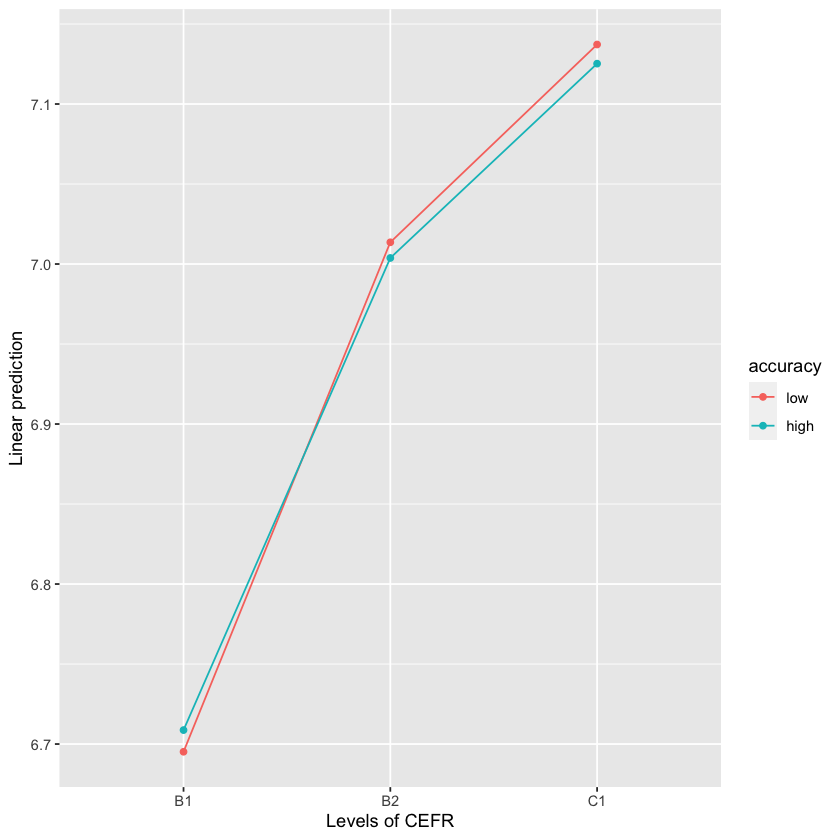

In [25]:
# Plot interactions

# Different panel for each CEFR, LR numeric on y-axis, soph on x-axis, map color to accuracy (or vice versa)
emmip(LR_exp2, accuracy ~ CEFR)

No interaction present

## Model 2 - Lexical Resource (exploratory)

Exploratory - find best-fitting model

#### Create model

In [26]:
# Base model just CEFR

m0 <- lm(LR_fair ~ CEFR, data = ratings)

In [27]:
# Summary of model

summary(m0)


Call:
lm(formula = LR_fair ~ CEFR, data = ratings)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.84048 -0.14419  0.05581  0.25952  0.59070 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.96465    0.02937 237.104   <2e-16 ***
CEFR1       -1.62047    0.04146 -39.086   <2e-16 ***
CEFR2        0.04465    0.04146   1.077    0.284    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3323 on 125 degrees of freedom
Multiple R-squared:  0.9403,	Adjusted R-squared:  0.9393 
F-statistic: 983.8 on 2 and 125 DF,  p-value: < 2.2e-16


In [28]:
# Add analytic scores and compare model at each step

# TR

m1 <- lm(LR_fair ~ CEFR + TR_fair, data = ratings)

anova(m0,m1)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,125,13.8035161,NA,NA,NA,NA
2,124,0.3358719,1,13.46764,4972.098,6.353605e-102


In [29]:
# CC

m2 <- lm(LR_fair ~ CEFR + TR_fair + CC_fair, data = ratings)

anova(m1,m2)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,124,0.3358719,NA,NA,NA,NA
2,123,0.3006994,1,0.03517248,14.38717,0.000232117


In [30]:
# GRA

m3 <- lm(LR_fair ~ CEFR + TR_fair + CC_fair + GRA_fair, data = ratings)

anova(m2,m3)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,123,0.3006994,NA,NA,NA,NA
2,122,0.2731331,1,0.02756632,12.31301,0.0006307559


In [31]:
# Soph

m4 <- lm(LR_fair ~ CEFR + TR_fair + CC_fair + GRA_fair + soph, data = ratings)

anova(m3,m4)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,122,0.2731331,NA,NA,NA,NA
2,120,0.2308319,2,0.04230116,10.99532,4.123762e-05


In [32]:
# Accuracy

m5 <- lm(LR_fair ~ CEFR + TR_fair + CC_fair + GRA_fair + soph + accuracy, data = ratings)

anova(m4,m5)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,120,0.2308319,NA,NA,NA,NA
2,119,0.2298236,1,0.001008296,0.5220841,0.4713716


In [33]:
# Soph_type

m6 <- lm(LR_fair ~ CEFR + TR_fair + CC_fair + GRA_fair + soph + soph_type, data = ratings)

m4 <- lm(LR_fair ~ CEFR + TR_fair + CC_fair + GRA_fair + soph, data = na.exclude(ratings))

anova(m4,m6)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,97,0.1523553,NA,NA,NA,NA
2,96,0.1328779,1,0.01947736,14.07176,0.0003010476


In [34]:
# CEFR:soph interaction

m7 <- lm(LR_fair ~ CEFR + TR_fair + CC_fair + GRA_fair + soph + soph_type +
         CEFR:soph, data = ratings)

anova(m6,m7)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,96,0.1328779,NA,NA,NA,NA
2,94,0.1179310,2,0.01494687,5.956896,0.003666407


In [35]:
# CEFR:accuracy interaction

m8 <- lm(LR_fair ~ CEFR + TR_fair + CC_fair + GRA_fair + soph + soph_type +
         CEFR:soph + CEFR:accuracy, data = ratings)

anova(m7,m8)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,94,0.11793105,NA,NA,NA,NA
2,91,0.07034367,3,0.04758738,20.52045,3.050348e-10


In [36]:
# soph:accuracy interaction

m9 <- lm(LR_fair ~ CEFR + TR_fair + CC_fair + GRA_fair + soph + soph_type +
         CEFR:soph + CEFR:accuracy + soph:accuracy, data = ratings)

anova(m8,m9)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,91,0.07034367,NA,NA,NA,NA
2,90,0.06860376,1,0.001739909,2.282554,0.1343395


In [37]:
# soph:soph_type interaction

m10 <- lm(LR_fair ~ CEFR + TR_fair + CC_fair + GRA_fair + soph + soph_type +
         CEFR:soph + CEFR:accuracy + soph:soph_type, data = ratings)

anova(m8,m10)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,91,0.07034367,NA,NA,NA,NA
2,90,0.06878353,1,0.00156014,2.04137,0.1565333


In [38]:
# Final exploratory model
summary(m8)


Call:
lm(formula = LR_fair ~ CEFR + TR_fair + CC_fair + GRA_fair + 
    soph + soph_type + CEFR:soph + CEFR:accuracy, data = ratings)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.046964 -0.016717 -0.005294  0.019943  0.053347 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.789439   0.064813  12.180  < 2e-16 ***
CEFR1            -0.169784   0.016478 -10.303  < 2e-16 ***
CEFR2             0.069512   0.006537  10.633  < 2e-16 ***
TR_fair           0.886634   0.145575   6.091 2.65e-08 ***
CC_fair          -0.790293   0.254221  -3.109  0.00251 ** 
GRA_fair          0.845276   0.189640   4.457 2.36e-05 ***
sophhigh          0.032668   0.006235   5.239 1.04e-06 ***
soph_type1       -0.017671   0.003104  -5.692 1.52e-07 ***
CEFR1:sophhigh   -0.016521   0.009852  -1.677  0.09697 .  
CEFR2:sophhigh   -0.009452   0.008626  -1.096  0.27607    
CEFRB1:accuracy1 -0.029322   0.006079  -4.824 5.63e-06 ***
CEFRB2:accuracy1  0.000291  

## Model 3 - Holistic score

Experimental - all variables of interest included and motivated interactions:  

Variables  
- sophistication
- sophistication type
- accuracy
- proficiency (CEFR)  

Interactions  
- CEFR and sophistication
- CEFR and accuracy
- sophistication and accuracy
- sophistication and sophistication type

#### Create model

In [39]:
HOL_exp <- lm(HOL_fair ~ CEFR + TR_fair + CC_fair + LR_fair + GRA_fair + soph + accuracy + soph_type +
             CEFR:soph + CEFR:accuracy + soph:accuracy + soph:soph_type, data = ratings)

#### Model interpretation

- Estimates are difficult to interpret because they are contrasts (need to be careful of + - signs)
- Useful to see which variables are significant
- For significant variables run post-hoc comparisons
- For significant interactions, create table of estimated means and plot the interactions
- Get CI figures from the tab model which pops up in different tab

In [40]:
# Summary of model

summary(HOL_exp)
tab_model(HOL_exp)


Call:
lm(formula = HOL_fair ~ CEFR + TR_fair + CC_fair + LR_fair + 
    GRA_fair + soph + accuracy + soph_type + CEFR:soph + CEFR:accuracy + 
    soph:accuracy + soph:soph_type, data = ratings)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.077027 -0.024063  0.004735  0.025469  0.045943 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -0.4793056  0.1357254  -3.531 0.000660 ***
CEFR1                0.1231784  0.0315806   3.900 0.000187 ***
CEFR2                0.0070562  0.0120340   0.586 0.559135    
TR_fair              0.5451426  0.2082791   2.617 0.010430 *  
CC_fair              0.0981681  0.3348420   0.293 0.770077    
LR_fair              0.1198438  0.1283201   0.934 0.352888    
GRA_fair             0.2902912  0.2656718   1.093 0.277522    
sophhigh             0.0153211  0.0085935   1.783 0.078055 .  
accuracy1           -0.0005497  0.0056681  -0.097 0.922967    
soph_type1          -0.0154043  0.0060457  -2.

Argument 'df_method' is deprecated. Please use 'ci_method' instead.



### Post-hoc analyses (regressions)

Because there is no soph_type for low soph, it is also necessary to create a separate model without soph_type, otherwise there is not contrast involving low soph.

In [41]:
# Create HOL experimental model v2 without soph_type

HOL_exp2 <- lm(HOL_fair ~ CEFR + TR_fair + CC_fair + LR_fair + GRA_fair + soph + accuracy +
             CEFR:soph + CEFR:accuracy + soph:accuracy, data = ratings)

#### Sophistication post-hoc analysis

In [42]:
# Create contrasts
HOL_exp_soph <- emmeans(HOL_exp2, "soph", data=ratings)

# Specify the levels
midvslow <- c(-1, 1, 0) # compare mean in mid to mean in low, ignore high
highvslow <- c(-1, 0, 1) # compare mean in high to mean in low, ignore mid
highvsmid <- c(0, -1, 1) # compare mean in high to mean in mid, ignore low

# Contrast the levels
contrast(HOL_exp_soph, method=list("midvslow"=midvslow,"highvslow"=highvslow,"highvsmid"=highvsmid),adjust="sidak")

NOTE: Results may be misleading due to involvement in interactions



 contrast  estimate      SE  df t.ratio p.value
 midvslow   0.02177 0.00901 110   2.417  0.0510
 highvslow  0.03150 0.00858 110   3.673  0.0011
 highvsmid  0.00973 0.00694 110   1.402  0.4150

Results are averaged over the levels of: CEFR, accuracy 
P value adjustment: sidak method for 3 tests 

#### Sophistication type post-hoc analysis

In [43]:
# Create contrasts
HOL_exp_soph_type <- emmeans(HOL_exp, "soph_type", data=ratings)

# Specify the levels
col_vs_noncol <- c(-1, 1) # compare mean in col to mean in non_col

# Contrast the levels
contrast(HOL_exp_soph_type, method=list("col_vs_noncol"=col_vs_noncol),adjust="sidak")

NOTE: Results may be misleading due to involvement in interactions



 contrast      estimate      SE df t.ratio p.value
 col_vs_noncol   0.0135 0.00878 88   1.540  0.1270

Results are averaged over the levels of: CEFR, soph, accuracy 

#### Accuracy post-hoc analysis

In [44]:
# Create contrasts
HOL_exp_accuracy <- emmeans(LR_exp, "accuracy", data=ratings)

# Specify the levels
highacc_vs_lowacc <- c(-1, 1) # compare mean in col to mean in non_col

# Contrast the levels
contrast(HOL_exp_accuracy, method=list("highacc_vs_lowacc"=highacc_vs_lowacc),adjust="sidak")

NOTE: Results may be misleading due to involvement in interactions



 contrast          estimate      SE df t.ratio p.value
 highacc_vs_lowacc 0.000972 0.00618 89   0.157  0.8754

Results are averaged over the levels of: CEFR, soph, soph_type 

## Survey comments

In [45]:
# Tag counts from Python notebook 11

Topics <- c('accuracy','error gravity','sophistication','range','preposition','spelling','accuracy (word choice)',
            'word formation','accuracy (collocation)', 'appropriacy','formulaic sequence','coherence and cohesion','style',
            'collocation','fluency')

Frequency <- c(45,16,60,44,4,12,3,8,7,38,25,3,10,38,2)

In [46]:
# Create dataframe

comments <- data.frame(Topics, Frequency)
comments$Frequency <- sapply(comments$Frequency, as.numeric)
comments <- comments[order(-Frequency),]
rownames(comments) <- NULL
head(comments)

,Topics,Frequency
,<chr>,<dbl>
1,sophistication,60
2,accuracy,45
3,range,44
4,appropriacy,38
5,collocation,38
6,formulaic sequence,25


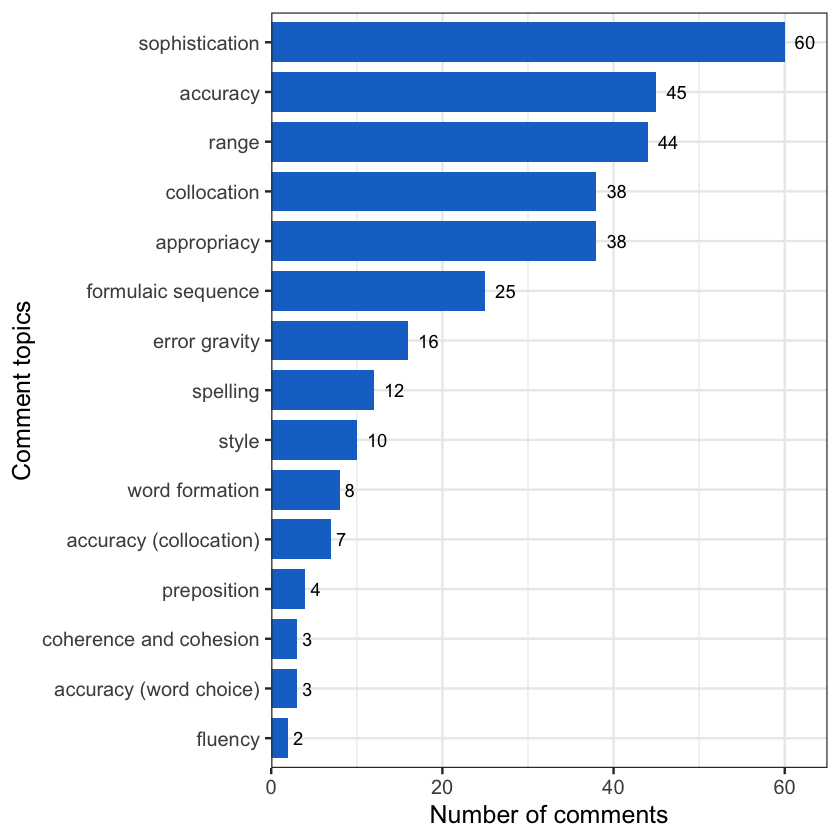

In [47]:
# Create plot (Figure 7 of dissertation)

ggplot(comments, aes(x=reorder(Topics,Frequency),y=Frequency)) +
geom_bar(position="dodge", stat = "summary", fun = "mean", width = 0.8,fill = "dodgerblue3") +
labs(x ="Comment topics", y = "Number of comments") +
theme_bw(base_size=15) + 
geom_text(aes(label=Frequency), position=position_dodge(width=0.9), vjust=.5, hjust=-.5) +
scale_y_continuous(limits=c(0, 65), expand = c(0,0)) +
coord_flip()

[Back to top](#Analyzing-survey-data)